In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import shutil 
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [1]:
direction = 'E:\\beer_labels' ####Numerowanie poszczególnych folderów
count = 0
print(len(os.listdir(direction)))
for dirc in os.listdir(direction):
    count = count + 1
    os.rename(os.path.join(direction,dirc), os.path.join(direction,str(count)))

NameError: name 'os' is not defined

In [6]:
direction = 'E:\\beer_labels'
features = []
labels = []

Z = np.arange(1,50)
for dirc in Z:
    
    label = int(dirc)
    new_dirc = os.path.join(direction, str(dirc))
    for image in os.listdir(new_dirc):
        image_path = os.path.join(new_dirc, image)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))
        image = np.array(image, dtype = np.float32)
        features.append(image)
        labels.append(label)
            
            
            

In [10]:
tab= []
number = 0
for dirc in Z:
    new_dirc = os.path.join(direction, str(dirc))
    for numbers in os.listdir(new_dirc):
        number = number + 1
    tab.append(number)
    number = 0
tab ### Sprawdzanie ile elementów ma każdy folder   

[92,
 69,
 69,
 69,
 69,
 92,
 69,
 84,
 69,
 69,
 69,
 92,
 69,
 92,
 92,
 76,
 92,
 84,
 69,
 85,
 69,
 92,
 61,
 92,
 61,
 84,
 61,
 69,
 92,
 85,
 61,
 92,
 76,
 84,
 69,
 69,
 84,
 92,
 84,
 84,
 92,
 92,
 92,
 69,
 69,
 87,
 92,
 92,
 84]

In [12]:
labels[251]

4

In [14]:
features = np.array(features, dtype=np.float32)


In [15]:
features = features / 255
labels = np.array(labels)

In [134]:
x_train,x_test,y_train,y_test = train_test_split(features,labels, test_size = 0.2)

In [4]:
model = Sequential ([
    layers.Input([224,224,3]),
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'Same' ),
    layers.MaxPooling2D(pool_size = (2,2), strides = 2),
    layers.Flatten(),
    layers.Dense(50,activation = 'sigmoid')
    
]
)

In [64]:
model.compile(optimizer = Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 50)                20070450  
                                                                 
Total params: 20,071,346
Trainable params: 20,071,346
Non-trainable params: 0
_________________________________________________________________


In [135]:
####checking our data 

model.output_shape
# history = model.fit(features,labels,batch_size=100,epochs=10)
history_model = model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
32/32 [==============================] - 140s 4s/step - loss: 2.6675e-04 - accuracy: 1.0000
Epoch 2/10
32/32 [==============================] - 132s 4s/step - loss: 2.5496e-04 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 108s 3s/step - loss: 2.4345e-04 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 109s 3s/step - loss: 2.3272e-04 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 120s 4s/step - loss: 2.2293e-04 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 132s 4s/step - loss: 2.1422e-04 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 123s 4s/step - loss: 2.0530e-04 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 129s 4s/step - loss: 1.9727e-04 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 147s 5s/step - loss: 1.8971e-04 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 132s 4s/step - loss:

In [139]:
y_pred = model.predict(x_test)


In [141]:
for z in range(len(y_pred)):
    print(np.argmax(y_pred[z]),y_test[z])

46 46
49 49
25 25
4 4
26 26
29 29
28 28
28 28
13 13
43 43
24 24
49 49
35 35
29 29
18 18
18 18
3 3
4 4
49 49
36 36
44 44
28 28
39 39
36 36
34 34
5 5
44 44
20 20
47 47
29 29
21 21
45 45
4 4
27 27
30 30
31 31
46 46
22 22
36 36
17 17
24 24
23 23
15 15
21 21
30 30
4 4
15 15
39 39
25 25
26 26
6 6
30 30
46 46
24 24
45 45
40 40
22 22
21 21
15 15
24 24
15 15
32 32
42 42
18 18
12 12
38 38
44 44
4 4
19 19
25 25
6 6
44 44
20 20
12 12
46 46
15 15
34 34
39 39
48 48
46 46
15 15
22 22
11 11
9 9
36 36
47 47
37 37
42 42
49 49
38 38
13 13
22 22
4 4
22 22
36 36
11 11
40 40
19 19
46 46
49 49
11 11
37 37
6 6
18 18
15 15
11 11
36 36
32 32
15 15
2 2
40 40
37 37
16 16
20 20
12 12
28 28
34 34
18 18
5 5
19 19
12 12
46 46
21 21
39 39
41 41
21 21
2 2
14 14
39 39
3 3
47 47
37 37
46 46
32 32
42 42
45 45
10 10
22 22
26 26
38 38
29 29
24 24
17 17
31 31
15 15
28 28
4 4
26 26
27 27
28 28
27 27
6 6
27 27
28 28
2 2
5 5
47 47
43 43
41 41
15 15
37 37
21 21
8 8
12 12
7 7
15 15
48 48
45 45
46 46
30 30
29 29
12 12
7 7
11 11
40

In [66]:
model.output_shape


(None, 50)

In [128]:
image_path = 'E:\\kkk.jpg' ####Przykładowy obraz z internetu dla testu 
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(224,224))
image = image.reshape(1,224,224,3) 

image = np.array(image, dtype = np.float32)

In [129]:
   # resize image to match model's expected sizing



In [131]:

# pred =model.predict(np.reshape(features[2243],(1,224,224,3)))
pred =model.predict(image)

In [132]:
np.argmax(pred)

4

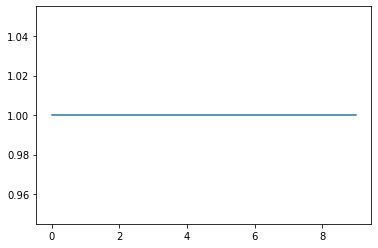

In [146]:
plt.plot(history.history['accuracy'])

In [145]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [3]:
plt.plot(history.history['loss'])

NameError: name 'plt' is not defined

In [2]:
import tensorflow_hub as hub 

In [ ]:
module_path = 'https://tfhub.dev/deepmind/bigbigan-resnet50/1'
